# Introduction

# Data Access

In [176]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

Les parties s’appliquent sur l’ensemble d’entraînement (donc **DailyDelhiClimateTrain.csv**)

In [177]:
data_dir=Path("./Data/")
data=pd.read_csv( 
    data_dir / "DailyDelhiClimateTrain.csv",
    index_col ="date", #on set la colonne data entant que index.
)
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [178]:
#verifier les types des données:
data.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

nous allons convertir la colonne date, en format de date

In [179]:
#verifier que le dataset ne contient pas de contenu vide.
data.dropna().shape

(1462, 4)

 et la variable **meantemp**


On va travailler avec le Dataframe **df**.

In [180]:
df=data[["meantemp"]]
df.head(5)

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


# Partie 1

 En utilisant la colonne de température moyenne; soit la meantemp, faites une analyse :
- Time Step (La régression de la température moyenne en fonction du temps)

In [181]:
#nous créons la colonne time en se basant sur les index de date, afin de simplifier la représentation.
#ainsi que la regression.
df["Time"]=np.arange(len(df.index))
df.head(5)

C:\Users\MIKED\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,meantemp,Time
date,,
2013-01-01,10.000000,0
2013-01-02,7.400000,1
2013-01-03,7.166667,2
2013-01-04,8.666667,3
2013-01-05,6.000000,4


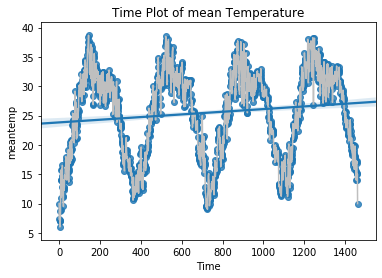

In [194]:
fig, ax = plt.subplots()
ax.plot('Time', 'meantemp', data=df, color='0.75') # on set la couleur des données pour mieux les visualiser
ax = sns.regplot(x='Time', y='meantemp', data=df) # on applique la ligne de regression dessus.
ax.set_title('Time Plot of mean Temperature'); # on set le titre.

- Lag Feature (La régression en fonction de l’instant n-1)

In [195]:
# on creer le shift de la colonne Lag feature
df["Lag_1"]=df["meantemp"].shift(1)
df.head(5)

C:\Users\MIKED\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,meantemp,Time,Lag_1
date,,,
2013-01-01,10.000000,0,NaN
2013-01-02,7.400000,1,10.000000
2013-01-03,7.166667,2,7.400000
2013-01-04,8.666667,3,7.166667
2013-01-05,6.000000,4,8.666667


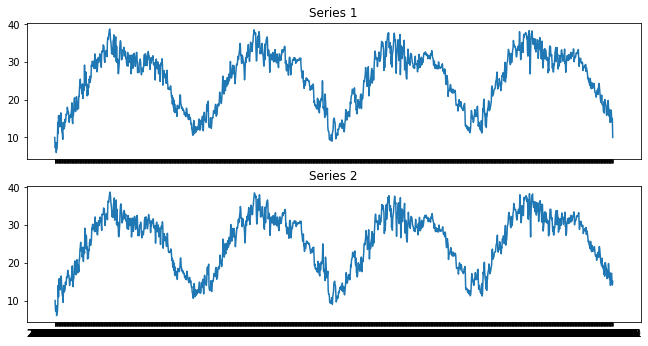

In [198]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(df['meantemp'])
ax1.set_title('Series 1')
ax2.plot(df['Lag_1'])
ax2.set_title('Series 2');

# Partie 2 (TODO)

En rappliquant tous les processus vus en cours, analyser la tendance :
- Tracer des graphes de moyennes glissantes (moving average)
- Utiliser les méthodes de Trend Engineering par le biais de la bibliothèque Deterministic Process afin de déterminer la tendance optimale.
- Faire des graphe pour la tendance linéaire, quadratique, cubique. Tester pour d’autres dimensions.
- Faire un forecast pour 15 jours futurs
- Enlevez la composante de tendance de votre série.


# Partie 3 (TODO)

En réitérant les mécanismes vus en cours, étudier la saisonnalité de la série temporelle:
- Réaliser des Seasonal Plots
- Utiliser les Fourier Features et analyser le périodogramme
- Utiliser les Deterministic Process avec le CalendarFourier afin de détecter la saisonnalité
- Appliquer ces méthodes sur la variable après élimination de la composante de tendance
- Faire un forecast pour 15 jours futurs
- Eliminer la saisonnalité de la composante privée de tendance

# Partie 4 (TODO)

En réitérant les processus vus en cours; analyser les cycles par le biais des Lagged Features:
- Tracer les courbes d’autocorrelation partielle
- Identifier les corrélations avec les Lags passés
- Analyser les cycles par le biais de Lags passés
- Faire un forecast pour 15 jours futurs
- Soustraire les cycles de la composante sans tendance ni saisonnalité

# Partie 5 (TODO)

Appliquer les processus hybrides